In [37]:
import pandas as pd
import seaborn as sns
import math
import seaborn as sns
import plotly.express as px

p_value_cutoff = 50


regulation_mapping = {
    'up'  : 'Lysate enriched',
    'down': 'KryoTissue enriched'
}

def pfunction(x):
    try:

        return math.log10(float(1/x)) 
    except:
        return 0
    
basket_annotation_path	= "/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_MTBs_Evaluation/TUPAC_SCORING_4th gen_230628.xlsx"
path_to_file = '/media/kusterlab/internal_projects/active/TOPAS/WP31/Playground/Retrospective_study/2023.06.22_AhS_PAPER_COHORT/FP_signatures_Lysate.xlsx'



In [38]:
signature_df = pd.read_excel(path_to_file)
signature_df['delta'] = signature_df['means_group1'] - signature_df['means_group2']
signature_df['type'] = signature_df.up_down.map(regulation_mapping)
signature_df['log(1/p_value)'] = signature_df.p_values.apply(lambda  x:pfunction(x))

In [39]:
basket_annotation_df = pd.read_excel(basket_annotation_path)

In [40]:

# plotly interactive plot
fig = px.scatter(signature_df,
                 x="delta",
                 y="log(1/p_value)",
                 color="type",
                 hover_name="names")
fig.add_hline(y=p_value_cutoff)
fig.show()
fig.write_html('/home/amir/Desktop/protocol_effect.html')


<AxesSubplot:xlabel='delta', ylabel='log(1/p_value)'>

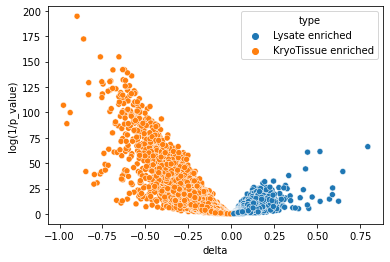

In [41]:

# seaborn plot
sns.scatterplot(data=signature_df, x="delta", y="log(1/p_value)", hue="type")


In [42]:

print(len(signature_df))
signature_df_final = signature_df[signature_df['log(1/p_value)'] < p_value_cutoff]
print(len(signature_df_final))
final_list = signature_df_final.names
final_list.to_csv('/home/amir/Desktop/Annika_files/final_list_after_protocol_removal.txt',index=False,header=False)
signature_df_removed = signature_df[signature_df['log(1/p_value)'] > p_value_cutoff]
signature_df_removed = signature_df_removed.names
signature_df_removed.to_csv('/home/amir/Desktop/Annika_files/removed_proteins.txt',index=False,header=False)

7075
6727


# Removed proteins in scoring file

In [43]:
all_basket_proteins = basket_annotation_df['GENE NAME'].unique().tolist()
print('all TUPAC scores proteins:')
print(len(all_basket_proteins))
print('number of proteins in the TUPAC scoring which are removed:')
print(len([x for x in all_basket_proteins if x in signature_df_removed.tolist()]))
print([x for x in all_basket_proteins if x in signature_df_removed.tolist()])

all TUPAC scores proteins:
1297
number of proteins in the TUPAC scoring which are removed:
8
['DIABLO', 'SKP1', 'RPA3', 'SRI', 'DUSP3', 'RAD23A', 'RFC2', 'NHEJ1']
